In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [101]:
dataset = "/Users/ertan/Documents/archive/dataset/resized"
data_dir = pathlib.Path(dataset)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2411


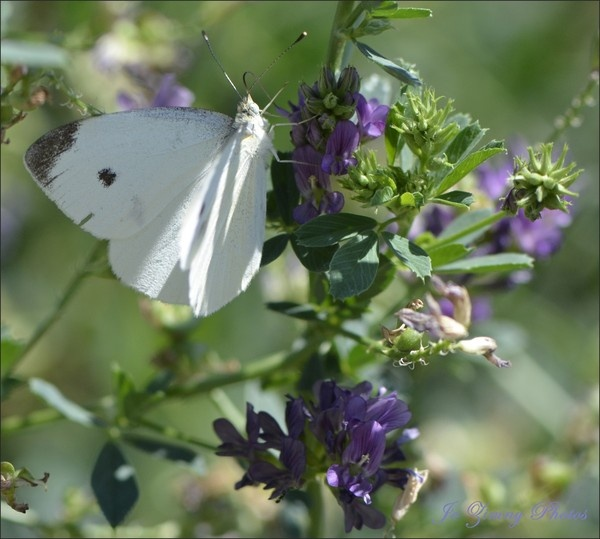

In [102]:
alfalfa = list(data_dir.glob('alfalfa/*'))
PIL.Image.open(str(alfalfa[1]))

In [103]:
train_ds = ImageDataGenerator(rescale=1./255)
val_ds = ImageDataGenerator(rescale=1./255)

In [104]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 2411 files belonging to 5 classes.
Using 1929 files for training.


In [105]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 2411 files belonging to 5 classes.
Using 482 files for validation.


In [106]:
class_names = train_ds.class_names
print(class_names)

['alfalfa', 'allium', 'borage', 'burdock', 'calendula']


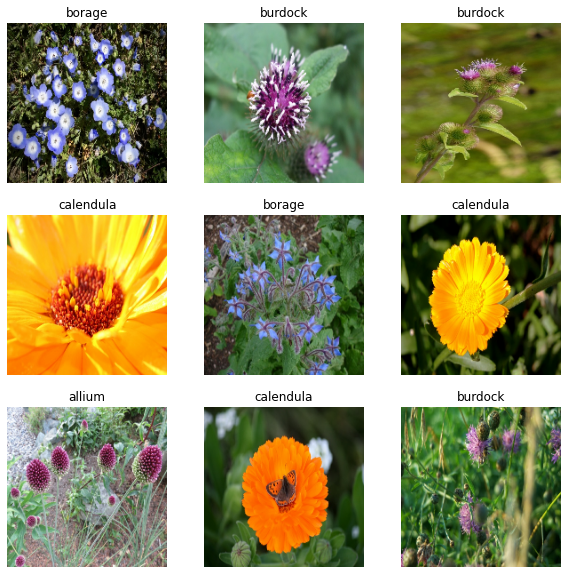

In [107]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [112]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 64)       

In [111]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
61/61 [==============================] - 93s 807ms/step - loss: 1.2199 - accuracy: 0.4702 - val_loss: 0.9860 - val_accuracy: 0.5643
Epoch 2/10
61/61 [==============================] - 47s 762ms/step - loss: 0.8112 - accuracy: 0.6744 - val_loss: 0.9115 - val_accuracy: 0.5996
Epoch 3/10
61/61 [==============================] - 45s 736ms/step - loss: 0.6825 - accuracy: 0.7424 - val_loss: 0.8529 - val_accuracy: 0.6328
Epoch 4/10
61/61 [==============================] - 49s 800ms/step - loss: 0.5056 - accuracy: 0.8134 - val_loss: 0.8541 - val_accuracy: 0.6805
Epoch 5/10
61/61 [==============================] - 48s 788ms/step - loss: 0.3790 - accuracy: 0.8621 - val_loss: 0.8707 - val_accuracy: 0.6950
Epoch 6/10
61/61 [==============================] - 47s 764ms/step - loss: 0.2579 - accuracy: 0.9025 - val_loss: 1.0528 - val_accuracy: 0.6888
Epoch 7/10
61/61 [==============================] - 46s 748ms/step - loss: 0.1311 - accuracy: 0.9611 - val_loss: 1.1553 - val_accuracy: 0.6971

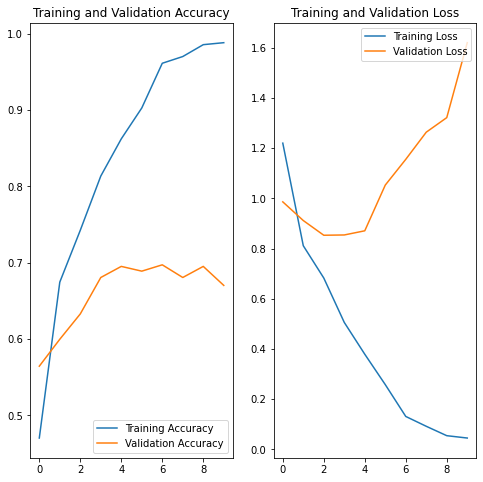

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [114]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(180,
                                  180,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [115]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [116]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
61/61 [==============================] - 46s 726ms/step - loss: 1.3159 - accuracy: 0.4220 - val_loss: 1.0982 - val_accuracy: 0.4730
Epoch 2/15
61/61 [==============================] - 52s 838ms/step - loss: 0.9890 - accuracy: 0.5816 - val_loss: 1.1325 - val_accuracy: 0.4917
Epoch 3/15
61/61 [==============================] - 51s 832ms/step - loss: 0.8388 - accuracy: 0.6537 - val_loss: 0.8909 - val_accuracy: 0.6369
Epoch 4/15
61/61 [==============================] - 45s 726ms/step - loss: 0.7895 - accuracy: 0.6941 - val_loss: 0.9733 - val_accuracy: 0.5705
Epoch 5/15
61/61 [==============================] - 55s 889ms/step - loss: 0.7303 - accuracy: 0.7128 - val_loss: 0.8452 - val_accuracy: 0.6556
Epoch 6/15
61/61 [==============================] - 54s 885ms/step - loss: 0.7014 - accuracy: 0.7309 - val_loss: 0.8954 - val_accuracy: 0.6224
Epoch 7/15
61/61 [==============================] - 60s 973ms/step - loss: 0.6587 - accuracy: 0.7470 - val_loss: 0.7458 - val_accuracy: 0.6929

In [1]:
plant_path = tf.keras.utils.get_file(origin="https://welldales.co.uk/wp-content/uploads/2022/10/50-UK-Borage-Kitchen-Herb-Seeds-for-Planting-Growing-Self-Seeding-Starflower-5.jpg")

img = tf.keras.utils.load_img(
    plant_path, target_size=(180, 180))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(This is "{} {:.2f}%".format(class_names[np.argmax(score)], 100 * np.max(score)))

NameError: name 'tf' is not defined

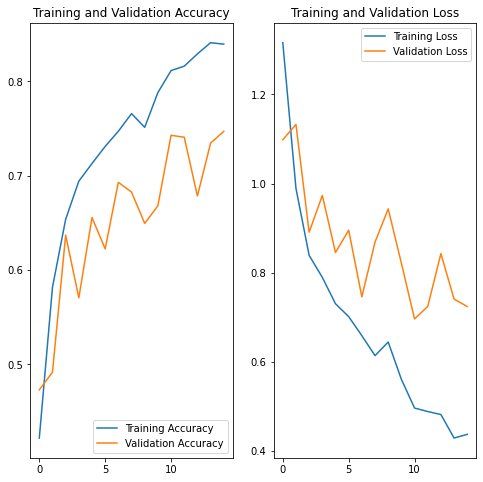

In [118]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()